In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit,state_vector_tomography

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [4]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [6]:
state_vector_tomography(qc,n_shots=8000,qubits_to_be_measured=[0])

{'0': 0.7075485849042453, '1': -0.7066647012551285}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

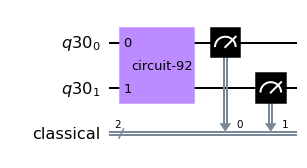

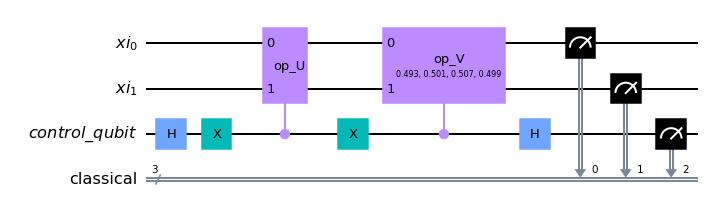

{'00': 0.4930770730829005,
 '01': -0.501373114556415,
 '10': 0.50658168146904,
 '11': -0.4988737315193094}

In [7]:
state_vector_tomography(qc,n_shots=8000,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [3]:
resolution=8
matrix_dimension=3
lista=list(range(0,2**resolution))
#eigenvalues_list=[0.65,0.25,0.06,0.04]


In [4]:
#4747
seed=900
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:
 [[0.58 0.49 0.27]
 [0.49 0.49 0.21]
 [0.27 0.21 0.14]]

eigenvalue: 0.05825170182999686 - eigenvector: [ 0.409 -0.735  0.541]
eigenvalue: 0.003030981753346985 - eigenvector: [-0.581  0.247  0.776]
eigenvalue: 1.1456672711010396 - eigenvector: [-0.704 -0.631 -0.326]


In [5]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [6]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.94922517, 0.00251127, 0.04826356, 0.        ]),
  array([[-0.70395477, -0.58064408,  0.4090234 ,  0.        ],
         [-0.63118319,  0.24738171, -0.73512588,  0.        ],
         [-0.32566158,  0.77566406,  0.54063832,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])),
 array([[0.4793119 , 0.40689113, 0.2271525 , 0.        ],
        [0.40689113, 0.40439972, 0.17641538, 0.        ],
        [0.2271525 , 0.17641538, 0.11628838, 0.        ],
        [0.        , 0.        , 0.        , 0.        ]]))

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


[0.8206230000000001, 0.0795985, 0.014217999999999998] [(0.94921875, array([0.70884345, 0.63216018, 0.32871542, 0.        ])), (0.046875, array([ 0.39986351, -0.71139247,  0.51927554,  0.        ])), (0.00390625, array([-0.59858509,  0.27954225,  0.76543195,  0.        ]))]


/Users/tommasofioravanti/Desktop/Intesa/Quantum/Esperimenti/QuPCA/QPCA/postprocessingUtilities/postprocessing_eig_reconstruction.py:84: RuntimeWarning: invalid value encountered in divide
  scaled_statevectors.append(statevector[i:i+len_input_matrix]/max_list[e])


(array([0.94921875, 0.046875  , 0.00390625]),
 array([[ 0.70884345,  0.39986351, -0.59858509],
        [ 0.63216018, -0.71139247,  0.27954225],
        [ 0.32871542,  0.51927554,  0.76543195]]))

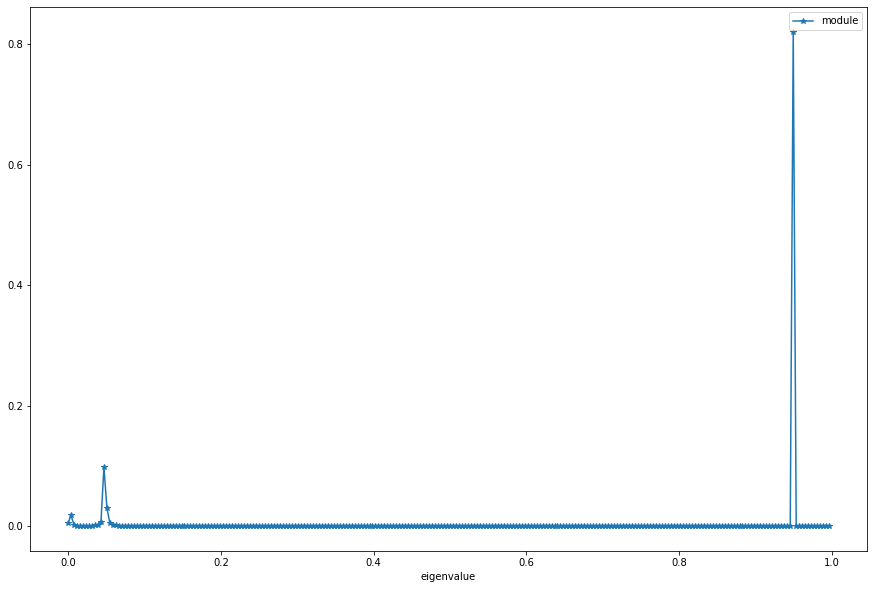

In [7]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [12]:
qpca.quantum_input_matrix_reconstruction()

array([[1.36780216, 1.59321697, 1.29460802],
       [1.59321697, 1.89242608, 1.56191731],
       [1.29460802, 1.56191731, 1.36063532]])

In [13]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.29666337, 0.34422543, 0.27702034],
        [0.34422543, 0.4084675 , 0.33558223],
        [0.27702034, 0.33558223, 0.29486913]]),
 (array([0.97831668, 0.00196037, 0.01972296, 0.        ]),
  array([[-0.54387379, -0.61004165, -0.57623822,  0.        ],
         [-0.64480462,  0.74326569, -0.17827818,  0.        ],
         [-0.53705522, -0.27460023,  0.7976004 ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])))